In [1]:
import pandas as pd
import metpy.calc as mc
from metpy.units import units
import numpy as np

In [2]:
def readBSmooring(file,skip=130):
    h = ['nnn','Year','Mn','Dy','Hr','Mi','s/n','SpSound','DirTr','SpeedBin','Depth','VelUp','VelErr','%good4','corr1','corr2','corr3','corr4','CorrAve','inten1','inten2','inten3','inten4','Julianday']
    c =pd.read_table(file, names=h,skiprows=skip, delim_whitespace=True)
    b = c.drop([0])
    t = []
    for index, a in b.iterrows():
        t.append(pd.to_datetime(str(int(a.Year))+'-'+str(int(a.Mn))+'-'+str(int(a.Dy))+' '+str(int(a.Hr))+':'+str(a.Mi)))
    b['datetime']=t
    b = b[b.SpeedBin!=9999.9]
    u,v, = [],[]
    for index, c in b.iterrows():
        ui,vi = mc.wind_components(c.SpeedBin*units('cm/s'),(c.DirTr-180)*units.deg)
        u.append(ui)
        v.append(vi)
    b['u'] = u
    b['v'] = v
    b = b[(b.SpeedBin < 1000) *(b.DirTr < 1000) ]
    
    return b
    
    
def readBSmooringSBE(file,skip=130):
    h = ['nnn','Year','Mn','Dy','Hr','Mi','PresR','PresD','Depth','Temp','Cond','Sal','Julianday']
    b = pd.read_table(file, names=h,skiprows=skip,delim_whitespace=True)
    b = b.dropna()
    b = b[b.Depth > 40]
    t = []
    for index, a in b.iterrows():
            if a.Hr == 24:
                t.append(pd.to_datetime(str(int(a.Year))+'-'+str(int(a.Mn))+'-'+str(int(a.Dy))+' 0:'+str(a.Mi)))
            else:
                t.append(pd.to_datetime(str(int(a.Year))+'-'+str(int(a.Mn))+'-'+str(int(a.Dy))+' '+str(int(a.Hr))+':'+str(a.Mi)))
    b['datetime']=t
    return b

dfs = []
for year in [2011,2012,2013,2016,2017,2018]:
    dfs.append(readBSmooringSBE('../data/physicalData/beringStrait/BeringStrait_'+str(year)+'_A3_SBE.txt',skip=131)) 
dfCTD = pd.concat(dfs)

dfs = []
for year,skipR in zip([2011,2012,2013,2016,2017,2018],[170,173,204,130,140,145]):
    dfs.append(readBSmooring('../data/physicalData/beringStrait/BeringStrait_'+str(year)+'_A3_11.rdat',skip=skipR))
dfVel = pd.concat(dfs)   
dfVel['daySinceJ']= dfVel.datetime.apply(lambda x:(x - pd.to_datetime('01-01-'+str(x.year))).total_seconds()/(60*60*24))

C:\Users\rober\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
C:\Users\rober\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
C:\Users\rober\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
C:\Users\rober\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
C:\Users\rober\Anaconda3\lib\site-packages\pandas\core\computation\e

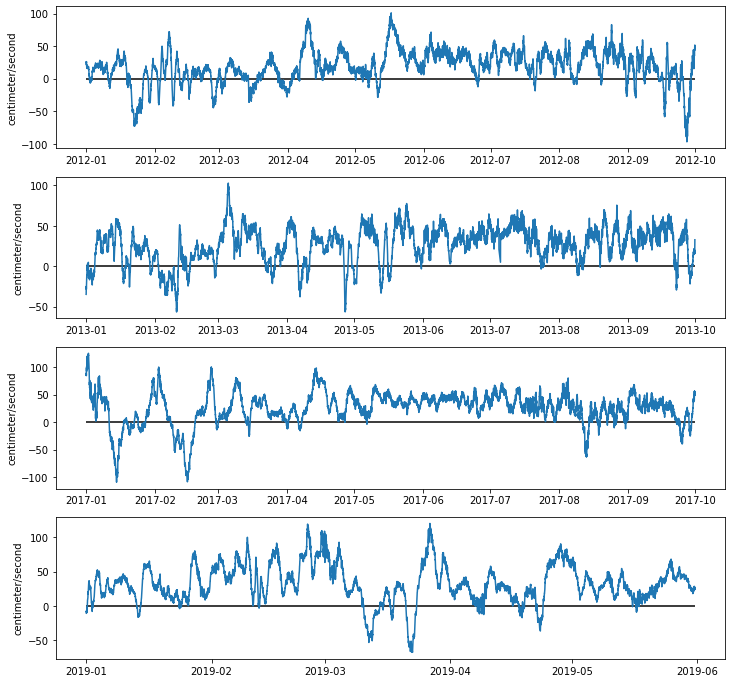

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig = plt.figure(figsize=(12,12))
plt.subplot(411)
dCur = dfVel[(dfVel.datetime >= pd.to_datetime('2012-01-01')) & (dfVel.datetime < pd.to_datetime('2012-10-01'))]
plt.plot(dCur.datetime, dCur.v)
plt.hlines([0], dCur.datetime.iloc[0], dCur.datetime.iloc[-1],'k')
plt.subplot(412)
dCur = dfVel[(dfVel.datetime >= pd.to_datetime('2013-01-01')) & (dfVel.datetime < pd.to_datetime('2013-10-01'))]
plt.plot(dCur.datetime, dCur.v)
plt.hlines([0], dCur.datetime.iloc[0], dCur.datetime.iloc[-1],'k')
plt.subplot(413)
dCur = dfVel[(dfVel.datetime >= pd.to_datetime('2017-01-01')) & (dfVel.datetime < pd.to_datetime('2017-10-01'))]
plt.plot(dCur.datetime, dCur.v)
plt.hlines([0], dCur.datetime.iloc[0], dCur.datetime.iloc[-1],'k')
plt.subplot(414)
dCur = dfVel[(dfVel.datetime >= pd.to_datetime('2019-01-01')) & (dfVel.datetime < pd.to_datetime('2019-10-01'))]
plt.plot(dCur.datetime, dCur.v)
plt.hlines([0], dCur.datetime.iloc[0], dCur.datetime.iloc[-1],'k')

Text(0.5, 0, 'Days since January 1st')

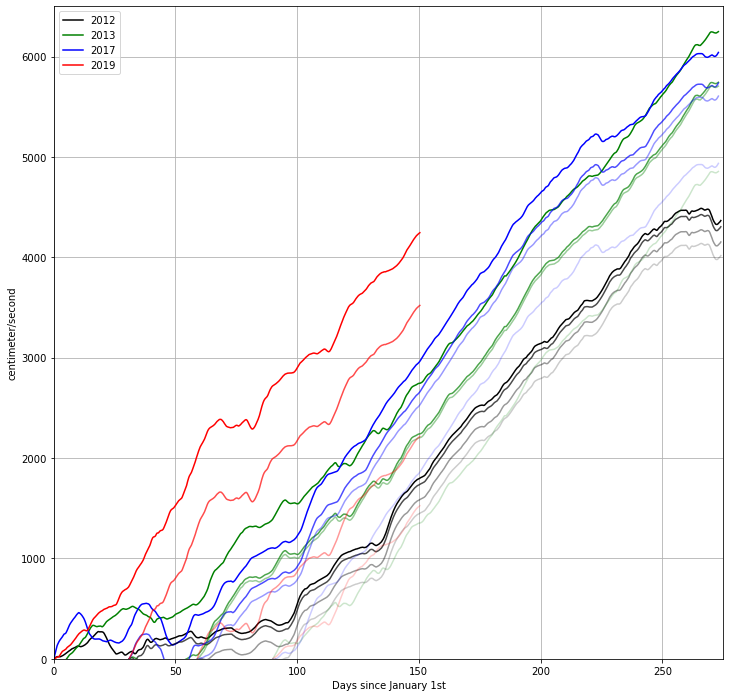

In [4]:
fig = plt.figure(figsize=(12,12))

df = dfVel[(dfVel.datetime>= pd.to_datetime('2012-01-01'))&(dfVel.datetime< pd.to_datetime('2012-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'k', linestyle='-',alpha=1)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2013-01-01'))&(dfVel.datetime< pd.to_datetime('2013-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'g', linestyle='-',alpha=1)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2017-01-01'))&(dfVel.datetime< pd.to_datetime('2017-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'b', linestyle='-',alpha=1)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2019-01-01'))&(dfVel.datetime< pd.to_datetime('2019-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'r', linestyle='-',alpha=1)


df = dfVel[(dfVel.datetime>= pd.to_datetime('2012-02-01'))&(dfVel.datetime< pd.to_datetime('2012-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'k', linestyle='-',alpha=0.7)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2013-02-01'))&(dfVel.datetime< pd.to_datetime('2013-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'g', linestyle='-',alpha=0.7)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2017-02-01'))&(dfVel.datetime< pd.to_datetime('2017-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'b', linestyle='-',alpha=0.7)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2019-02-01'))&(dfVel.datetime< pd.to_datetime('2019-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'r', linestyle='-',alpha=0.7)

df = dfVel[(dfVel.datetime>= pd.to_datetime('2012-03-01'))&(dfVel.datetime< pd.to_datetime('2012-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'k', linestyle='-',alpha=0.4)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2013-03-01'))&(dfVel.datetime< pd.to_datetime('2013-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'g', linestyle='-',alpha=0.4)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2017-03-01'))&(dfVel.datetime< pd.to_datetime('2017-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'b', linestyle='-',alpha=0.4)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2019-03-01'))&(dfVel.datetime< pd.to_datetime('2019-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'r', linestyle='-',alpha=0.4)

df = dfVel[(dfVel.datetime>= pd.to_datetime('2012-04-01'))&(dfVel.datetime< pd.to_datetime('2012-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'k', linestyle='-',alpha=0.2)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2013-04-01'))&(dfVel.datetime< pd.to_datetime('2013-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'g', linestyle='-',alpha=0.2)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2017-04-01'))&(dfVel.datetime< pd.to_datetime('2017-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'b', linestyle='-',alpha=0.2)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2019-04-01'))&(dfVel.datetime< pd.to_datetime('2019-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'r', linestyle='-',alpha=0.2)
plt.ylim(0,6500)
plt.xlim(0,275)
plt.grid()

plt.legend(['2012','2013','2017','2019'])
plt.xlabel('Days since January 1st')

In [164]:
dfVel[(dfVel.datetime>= pd.to_datetime('2019-01-01'))]

,nnn,Year,Mn,Dy,Hr,Mi,s/n,SpSound,DirTr,SpeedBin,...,CorrAve,inten1,inten2,inten3,inten4,Julianday,datetime,u,v,daySinceJ
7005,7005,2019.0,1.0,1.0,0.0,3.0,2332.0,1439000.0,170.8,7.8,...,126.0,126.0,99.0,96.0,100.0,101.0,2019-01-01 00:03:00,1.2470732639963105 centimeter / second,-7.699662867569305 centimeter / second,0.002083
7006,7006,2019.0,1.0,1.0,0.0,33.0,2332.0,1439000.0,217.6,9.5,...,125.0,126.0,102.0,99.0,101.0,104.0,2019-01-01 00:33:00,-5.796379057062041 centimeter / second,-7.526751611874312 centimeter / second,0.022917
7007,7007,2019.0,1.0,1.0,1.0,3.0,2332.0,1439000.0,174.9,10.3,...,128.0,126.0,99.0,93.0,99.0,102.0,2019-01-01 01:03:00,0.9156112577243467 centimeter / second,-10.259222973730928 centimeter / second,0.043750
7008,7008,2019.0,1.0,1.0,1.0,33.0,2332.0,1439000.0,171.5,11.0,...,127.0,126.0,100.0,102.0,103.0,106.0,2019-01-01 01:33:00,1.625903522425717 centimeter / second,-10.879174496981085 centimeter / second,0.064583
7009,7009,2019.0,1.0,1.0,2.0,3.0,2332.0,1439000.0,175.2,10.0,...,126.0,126.0,102.0,102.0,104.0,108.0,2019-01-01 02:03:00,0.8367784333231569 centimeter / second,-9.964928592495044 centimeter / second,0.085417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14219,14219,2019.0,5.0,31.0,7.0,5.0,2332.0,1446000.0,331.0,31.7,...,126.0,125.0,97.0,93.0,98.0,101.0,2019-05-31 07:05:00,-15.368464961808888 centimeter / second,27.725444716318844 centimeter / second,150.295139
14220,14220,2019.0,5.0,31.0,7.0,35.0,2332.0,1446000.0,328.4,32.5,...,126.0,123.0,100.0,98.0,105.0,103.0,2019-05-31 07:35:00,-17.029541944027585 centimeter / second,27.681125359649037 centimeter / second,150.315972
14221,14221,2019.0,5.0,31.0,8.0,5.0,2332.0,1446000.0,328.2,27.9,...,126.0,122.0,102.0,100.0,107.0,105.0,2019-05-31 08:05:00,-14.702066694357308 centimeter / second,23.712006134333496 centimeter / second,150.336806
14222,14222,2019.0,5.0,31.0,8.0,35.0,2332.0,1446000.0,332.0,30.4,...,127.0,128.0,101.0,101.0,104.0,104.0,2019-05-31 08:35:00,-14.271935508691076 centimeter / second,26.84160682291138 centimeter / second,150.357639


Text(0.5, 0, 'Days since January 1st')

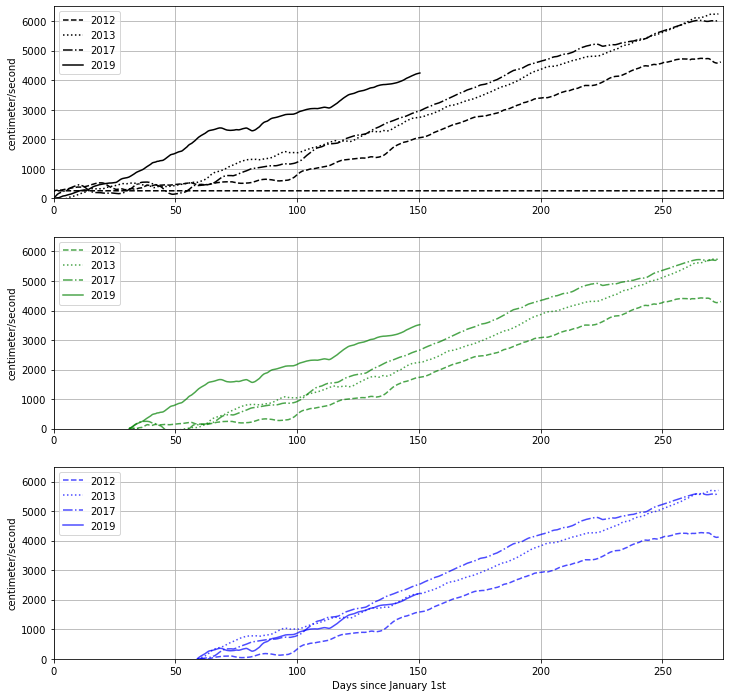

In [5]:
fig = plt.figure(figsize=(12,12))
plt.subplot(311)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2011-11-01'))&(dfVel.datetime< pd.to_datetime('2012-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),'--k')
df = dfVel[(dfVel.datetime>= pd.to_datetime('2013-01-01'))&(dfVel.datetime< pd.to_datetime('2013-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),':k')
df = dfVel[(dfVel.datetime>= pd.to_datetime('2017-01-01'))&(dfVel.datetime< pd.to_datetime('2017-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),'-.k')
df = dfVel[(dfVel.datetime>= pd.to_datetime('2019-01-01'))&(dfVel.datetime< pd.to_datetime('2019-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),'-k')
plt.grid()
plt.ylim(0,6500)
plt.xlim(0,275)
plt.legend(['2012','2013','2017','2019'])

plt.subplot(312)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2012-02-01'))&(dfVel.datetime< pd.to_datetime('2012-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'g', linestyle='--',alpha=0.7)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2013-02-01'))&(dfVel.datetime< pd.to_datetime('2013-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'g', linestyle=':',alpha=0.7)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2017-02-01'))&(dfVel.datetime< pd.to_datetime('2017-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'g', linestyle='-.',alpha=0.7)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2019-02-01'))&(dfVel.datetime< pd.to_datetime('2019-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'g', linestyle='-',alpha=0.7)
plt.ylim(0,6500)
plt.xlim(0,275)
plt.grid()
plt.legend(['2012','2013','2017','2019'])

plt.subplot(313)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2012-03-01'))&(dfVel.datetime< pd.to_datetime('2012-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'b', linestyle='--',alpha=0.7)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2013-03-01'))&(dfVel.datetime< pd.to_datetime('2013-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'b', linestyle=':',alpha=0.7)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2017-03-01'))&(dfVel.datetime< pd.to_datetime('2017-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'b', linestyle='-.',alpha=0.7)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2019-03-01'))&(dfVel.datetime< pd.to_datetime('2019-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'b', linestyle='-',alpha=0.7)
plt.ylim(0,6500)
plt.xlim(0,275)
plt.grid()

plt.legend(['2012','2013','2017','2019'])
plt.xlabel('Days since January 1st')

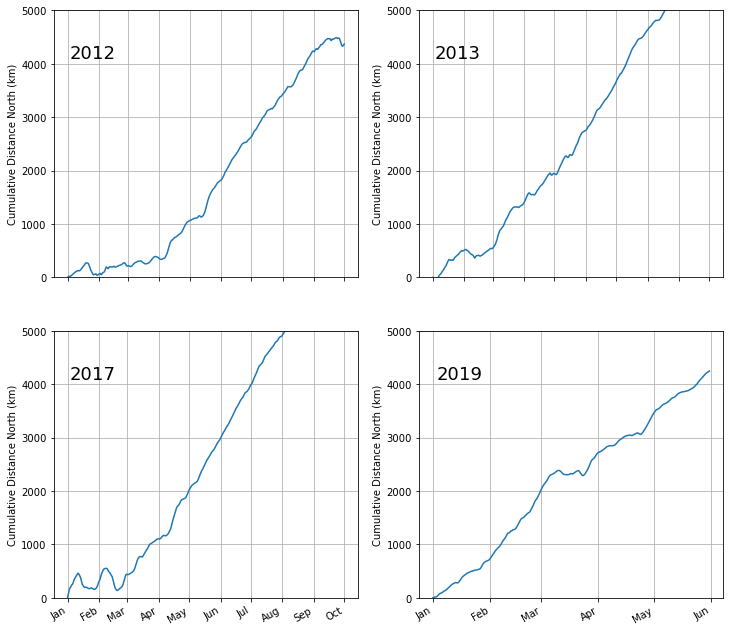

In [7]:
def cumNplot(df):
    plt.plot(df.datetime,np.cumsum(df.v*60*30/100/1000))
    plt.grid()
    plt.text(df.datetime.iloc[100],4100,str(int(df.Year.unique()[0])),fontsize=18)
    ax = plt.gca()
    ax.set_ylim(0,5000)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    fig.autofmt_xdate()
    plt.ylabel('Cumulative Distance North (km)')

fig = plt.figure(figsize=(12,12))
plt.subplot(221)
cumNplot(dfVel[(dfVel.datetime>= pd.to_datetime('2012-01-01'))&(dfVel.datetime< pd.to_datetime('2012-10-01'))])
plt.subplot(222)
cumNplot(dfVel[(dfVel.datetime>= pd.to_datetime('2013-01-01'))&(dfVel.datetime< pd.to_datetime('2013-10-01'))])
plt.subplot(223)
cumNplot(dfVel[(dfVel.datetime>= pd.to_datetime('2017-01-01'))&(dfVel.datetime< pd.to_datetime('2017-10-01'))])
plt.subplot(224)
cumNplot(dfVel[(dfVel.datetime>= pd.to_datetime('2019-01-01'))&(dfVel.datetime< pd.to_datetime('2019-10-01'))])

In [11]:
dfCTD

,nnn,Year,Mn,Dy,Hr,Mi,PresR,PresD,Depth,Temp,Cond,Sal,Julianday,datetime
0,1,2011,7,14,0,0,-0.15,-0.05,-0.05,11.188,0.0000,0.006,195.0000,2011-07-14 00:00:00
1,2,2011,7,14,0,15,-0.15,-0.05,-0.05,11.221,0.0000,0.006,195.0104,2011-07-14 00:15:00
2,3,2011,7,14,0,30,-0.15,-0.05,-0.05,11.265,0.0000,0.006,195.0208,2011-07-14 00:30:00
3,4,2011,7,14,0,45,-0.15,-0.05,-0.05,11.318,0.0000,0.006,195.0312,2011-07-14 00:45:00
4,5,2011,7,14,1,0,-0.15,-0.05,-0.05,11.383,0.0000,0.006,195.0417,2011-07-14 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9468,9496,2019,9,7,15,8,43.17,43.23,42.80,3.546,2.9961,32.353,615.6306,2019-09-07 15:08:00
9469,9497,2019,9,7,16,8,43.15,43.22,42.79,3.636,3.0004,32.316,615.6722,2019-09-07 16:08:00
9470,9498,2019,9,7,17,8,-0.01,0.05,0.05,12.733,3.5379,29.942,615.7139,2019-09-07 17:08:00
9471,9499,2019,9,7,18,8,-0.90,-0.84,-0.83,26.769,0.9332,5.030,615.7556,2019-09-07 18:08:00


<AxesSubplot:>

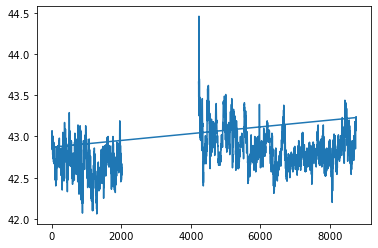

In [40]:
df = dfCTD[(dfCTD.datetime>= pd.to_datetime('2017-01-01'))&(dfCTD.datetime< pd.to_datetime('2017-10-01'))]
df.Depth.plot()

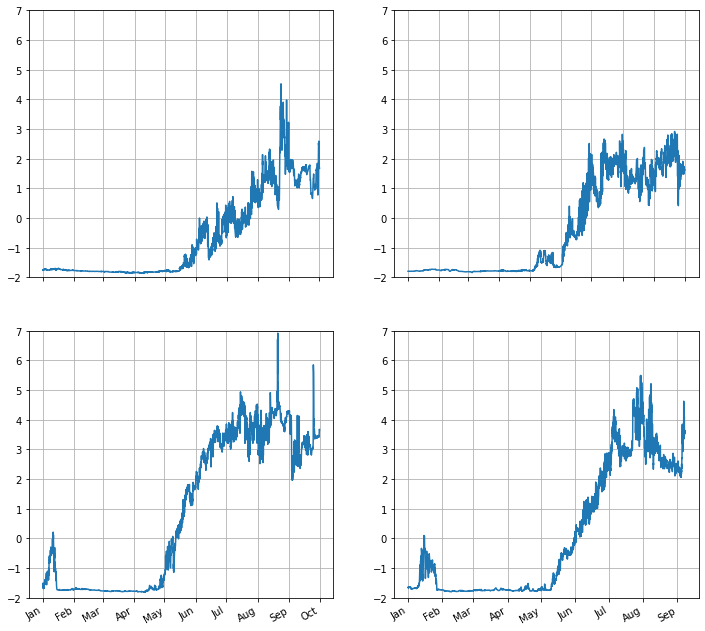

In [8]:

fig = plt.figure(figsize=(12,12))
plt.subplot(221)
df = dfCTD[(dfCTD.datetime>= pd.to_datetime('2012-01-01'))&(dfCTD.datetime< pd.to_datetime('2012-10-01')) & (dfCTD.Temp <8)]
plt.plot(df.datetime,df.Temp)
plt.ylim(-2,7)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.grid()
fig.autofmt_xdate()
plt.subplot(222)
df = dfCTD[(dfCTD.datetime>= pd.to_datetime('2013-01-01'))&(dfCTD.datetime< pd.to_datetime('2013-10-01'))]
plt.plot(df.datetime,df.Temp)
plt.ylim(-2,7)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.grid()
fig.autofmt_xdate()
plt.subplot(223)
df = dfCTD[(dfCTD.datetime>= pd.to_datetime('2017-01-01'))&(dfCTD.datetime< pd.to_datetime('2017-10-01'))]
plt.plot(df.datetime,df.Temp)
plt.ylim(-2,7)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.grid()
fig.autofmt_xdate()
plt.subplot(224)
df = dfCTD[(dfCTD.datetime>= pd.to_datetime('2019-01-01'))&(dfCTD.datetime< pd.to_datetime('2019-10-01'))]
plt.plot(df.datetime,df.Temp)
plt.ylim(-2,7)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.grid()
fig.autofmt_xdate()

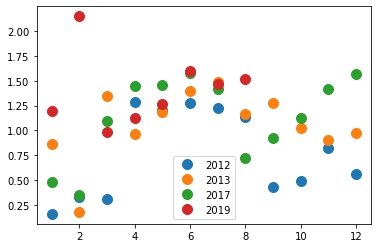

In [7]:
dfMonthly = pd.read_csv('../data/physicalData/beringStrait/monthlytransport.csv',names = ['index','mooring','year','month','mean','error','meanCorr','errorCorr'],skiprows=1,na_values='#NUM!')
plt.plot(dfMonthly[dfMonthly.year == 2012].month,dfMonthly[dfMonthly.year == 2012].meanCorr,'.',markersize=20)
plt.plot(dfMonthly[dfMonthly.year == 2013].month,dfMonthly[dfMonthly.year == 2013].meanCorr,'.',markersize=20)
plt.plot(dfMonthly[dfMonthly.year == 2017].month,dfMonthly[dfMonthly.year == 2017].meanCorr,'.',markersize=20)
plt.plot(dfMonthly[dfMonthly.year == 2019].month,dfMonthly[dfMonthly.year == 2019].meanCorr,'.',markersize=20)
#dfMonthly
plt.legend(['2012','2013','2017','2019'])

In [143]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from datetime import datetime

df = pd.read_table('../data/physicalData/beringStrait/BeringStrait_Monthlymeans_TEMPERATURE_Jan2021.txt',names = ['mooring','year','month','meanT','errorT'],skiprows=50,delim_whitespace=True,header=None)
df['month'] = df.month.astype(str)
df['year'] = df.year.astype(str)
df['monthYear'] = df.month+'-'+df.year
df['monthYear'] = pd.to_datetime(df.monthYear,format='%m-%Y')

2012 [-1.78333333] [-1.35333333] [1.08]
2013 [-1.77666667] [-1.15666667] [1.63]
2017 [-1.63333333] [0.56666667] [3.61333333]
2019 [-1.59333333] [-0.51] [3.19]


(10047.0, 18077.0)

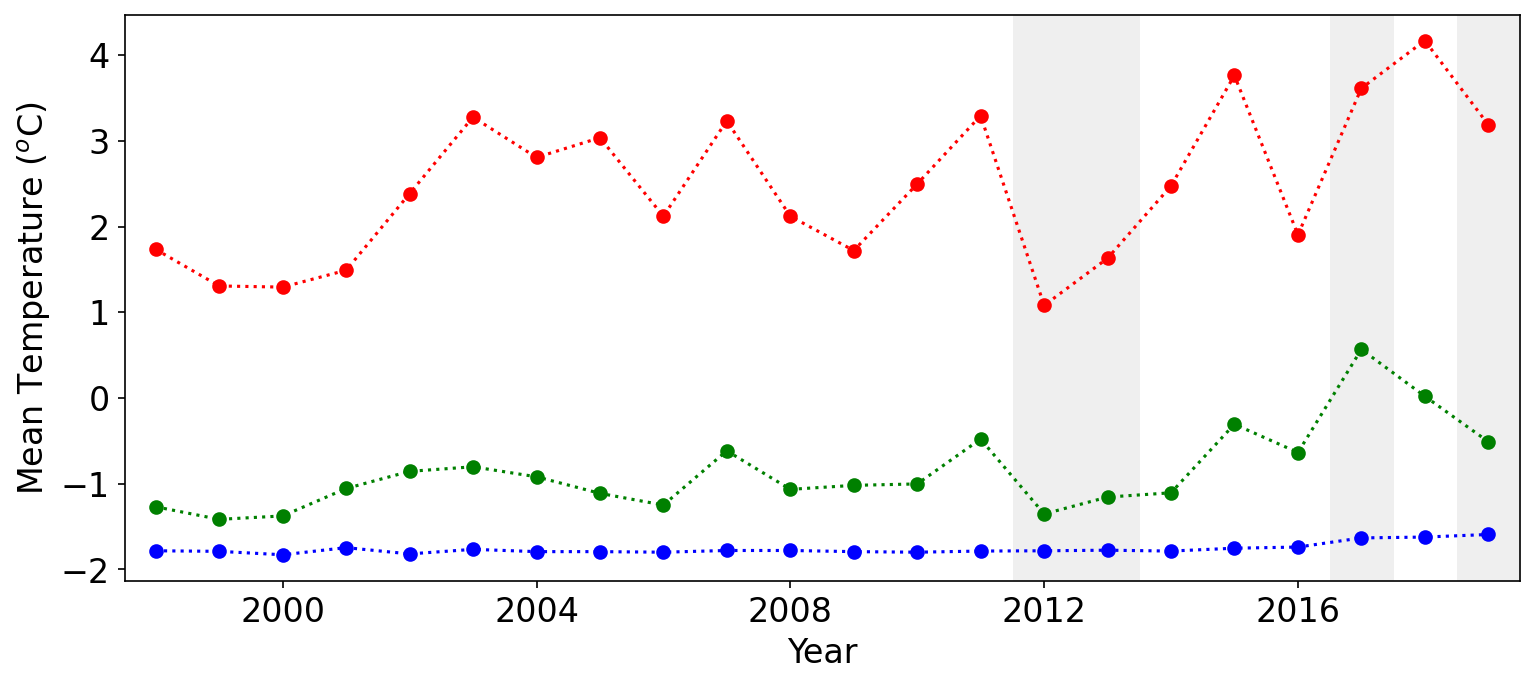

In [144]:
fig = plt.figure(figsize = (12,5),dpi=150)
plt.rcParams.update({'font.size': 16})
dfW = df[(df.monthYear.dt.month >= 1)& (df.monthYear.dt.month <= 3)& (df.monthYear.dt.year != 1997)] # Winter
dfW = dfW.set_index('monthYear').resample('1Y').mean()

dfSp = df[(df.monthYear.dt.month >= 4)& (df.monthYear.dt.month <= 6)& (df.monthYear.dt.year != 1997)] # Spring
dfSp = dfSp.set_index('monthYear').resample('1Y').mean()

dfSu = df[(df.monthYear.dt.month >= 7)& (df.monthYear.dt.month <= 9)& (df.monthYear.dt.year != 1997)] # Summer
dfSu = dfSu.set_index('monthYear').resample('1Y').mean()


dfFa = df[(df.monthYear.dt.month >= 1)& (df.monthYear.dt.month < 9)& (df.monthYear.dt.year != 1997)] # Summer
dfFa = dfFa.set_index('monthYear').resample('1Y').mean()

ax = plt.subplot(111)
ax.plot(dfW.index-pd.Timedelta(days=365),dfW.meanT,':o',color='b')
ax.plot(dfSp.index-pd.Timedelta(days=365),dfSp.meanT,':o',color='green')
ax.plot(dfSu.index-pd.Timedelta(days=365),dfSu.meanT,':o',color='red')
#ax.plot(dfFa.index-pd.Timedelta(days=365),dfFa.meanT,'-o',color='k')
#ax.plot(df.monthYear,df.meanT,color = 'grey')
for year in [2012,2013,2017,2019]:
    rect =Rectangle((pd.to_datetime(year,format='%Y')-pd.Timedelta(days=180),ax.get_ylim()[0]),pd.Timedelta(days=365),ax.get_ylim()[1]-ax.get_ylim()[0],edgecolor='None',facecolor="lightgray",alpha=0.35)
    ax.add_patch(rect)
    print(year,dfW[dfW.index.year == year].meanT.values,dfSp[dfSp.index.year == year].meanT.values,dfSu[dfSu.index.year == year].meanT.values)
#plt.legend(['Winter (JFM)','Spring (AMJ)','Summer (JAS)'],fontsize=14)
plt.xlabel('Year')
plt.ylabel('Mean Temperature ($^{o}$C)')
plt.xlim(pd.to_datetime(1998,format='%Y')-pd.Timedelta(days=180),pd.to_datetime(2019,format='%Y')+pd.Timedelta(days=180))

In [139]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from datetime import datetime

df = pd.read_table('../data/physicalData/beringStrait/BeringStrait_Monthlymeans_TRANSPORT_Jan2021.txt',names = ['mooring','year','month','meanTr','errorTr','meanTrC','errorTrC'],skiprows=50,delim_whitespace=True,header=None)
df['month'] = df.month.astype(str)
df['year'] = df.year.astype(str)
df['monthYear'] = df.month+'-'+df.year
df['monthYear'] = pd.to_datetime(df.monthYear,format='%m-%Y')

2012 [0.26666667] [1.26] [0.93333333]
2013 [0.79666667] [1.18333333] [1.31333333]
2017 [0.64333333] [1.49666667] [1.02]
2019 [1.44333333] [1.33333333] [1.495]


(10047.0, 18077.0)

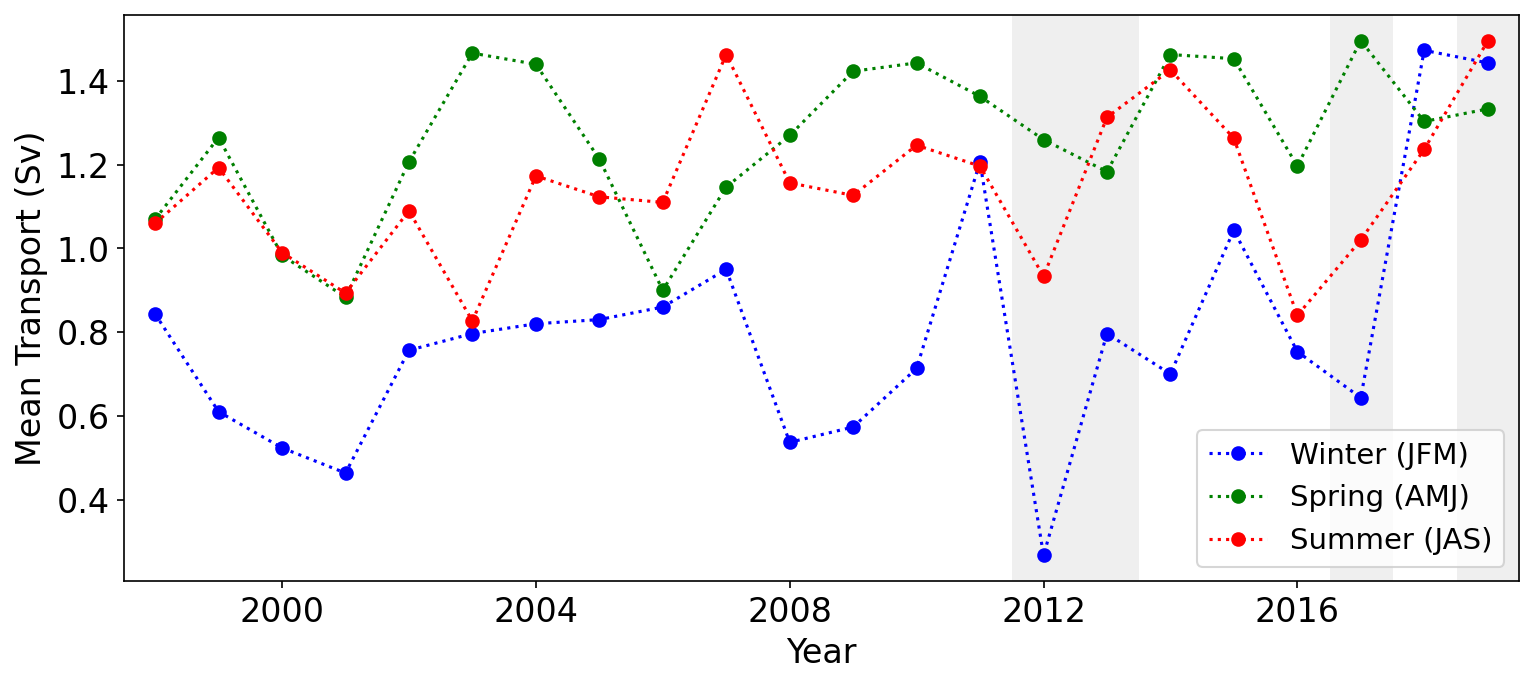

In [141]:
fig = plt.figure(figsize = (12,5),dpi=150)
dfW = df[(df.monthYear.dt.month >= 1)& (df.monthYear.dt.month <= 3)& (df.monthYear.dt.year != 1997)] # Winter
dfW = dfW.set_index('monthYear').resample('1Y').mean()

dfSp = df[(df.monthYear.dt.month >= 4)& (df.monthYear.dt.month <= 6)& (df.monthYear.dt.year != 1997)] # Spring
dfSp = dfSp.set_index('monthYear').resample('1Y').mean()

dfSu = df[(df.monthYear.dt.month >= 7)& (df.monthYear.dt.month <= 9)& (df.monthYear.dt.year != 1997)] # Summer
dfSu = dfSu.set_index('monthYear').resample('1Y').mean()
dfFa = df[(df.monthYear.dt.month >= 1)& (df.monthYear.dt.month < 9)& (df.monthYear.dt.year != 1997)] # Summer
dfFa = dfFa.set_index('monthYear').resample('1Y').mean()

ax = plt.subplot(111)
ax.plot(dfW.index-pd.Timedelta(days=365),dfW.meanTrC,':o',color='b')
ax.plot(dfSp.index-pd.Timedelta(days=365),dfSp.meanTrC,':o',color='green')
ax.plot(dfSu.index-pd.Timedelta(days=365),dfSu.meanTrC,':o',color='red')
#ax.plot(dfFa.index-pd.Timedelta(days=365),dfFa.meanTrC,'-o',color='k')
#ax.plot(df.monthYear,df.meanT,color = 'grey')
for year in [2012,2013,2017,2019]:
    rect =Rectangle((pd.to_datetime(year,format='%Y')-pd.Timedelta(days=180),ax.get_ylim()[0]),pd.Timedelta(days=365),ax.get_ylim()[1]-ax.get_ylim()[0],edgecolor='None',facecolor="lightgray",alpha=0.35)
    ax.add_patch(rect)
    print(year,dfW[dfW.index.year == year].meanTrC.values,dfSp[dfSp.index.year == year].meanTrC.values,dfSu[dfSu.index.year == year].meanTrC.values)
plt.legend(['Winter (JFM)','Spring (AMJ)','Summer (JAS)'],fontsize=14)
plt.xlabel('Year')
plt.ylabel('Mean Transport (Sv)')
plt.xlim(pd.to_datetime(1998,format='%Y')-pd.Timedelta(days=180),pd.to_datetime(2019,format='%Y')+pd.Timedelta(days=180))

2012 [-0.9525]
2013 [-0.725]
2017 [0.5575]
2019 [0.00875]


Text(0.5, 0, 'Year')

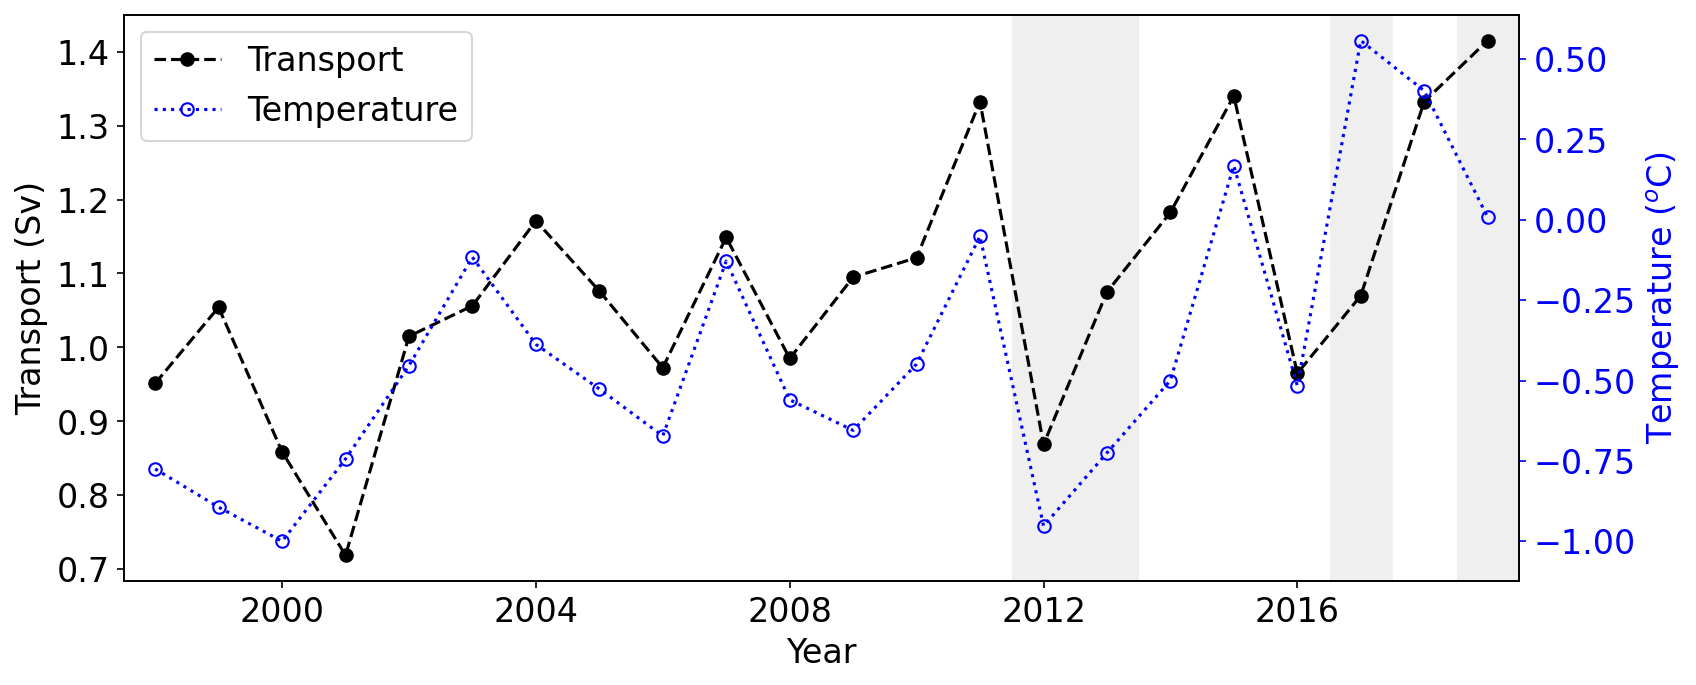

In [25]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from datetime import datetime
fig = plt.figure(figsize = (12,5),dpi=150)
plt.rcParams.update({'font.size': 16.0})
df = pd.read_table('../data/physicalData/beringStrait/BeringStrait_Monthlymeans_TRANSPORT_Jan2021.txt',names = ['mooring','year','month','meanTr','errorTr','meanTrC','errorTrC'],skiprows=50,delim_whitespace=True,header=None)
df['month'] = df.month.astype(str)
df['year'] = df.year.astype(str)
df['monthYear'] = df.month+'-'+df.year
df['monthYear'] = pd.to_datetime(df.monthYear,format='%m-%Y')
dfFa = df[(df.monthYear.dt.month >= 1)& (df.monthYear.dt.month < 9)& (df.monthYear.dt.year != 1997)] # Summer
dfFa = dfFa.set_index('monthYear').resample('1Y').mean()
ax = plt.subplot(111)
a = ax.plot(dfFa.index-pd.Timedelta(days=365),dfFa.meanTrC,'--o',color='k',label= 'Transport')

df = pd.read_table('../data/physicalData/beringStrait/BeringStrait_Monthlymeans_TEMPERATURE_Jan2021.txt',names = ['mooring','year','month','meanT','errorT'],skiprows=50,delim_whitespace=True,header=None)
df['month'] = df.month.astype(str)
df['year'] = df.year.astype(str)
df['monthYear'] = df.month+'-'+df.year
df['monthYear'] = pd.to_datetime(df.monthYear,format='%m-%Y')
dfFa = df[(df.monthYear.dt.month >= 1)& (df.monthYear.dt.month < 9)& (df.monthYear.dt.year != 1997)] # Summer
dfFa = dfFa.set_index('monthYear').resample('1Y').mean()
ax2 = ax.twinx()
b = ax2.plot(dfFa.index-pd.Timedelta(days=365),dfFa.meanT,':o',markerfacecolor='None',color='blue',label='Temperature')

custom_lines = [Line2D([0], [0], marker='o',color='k', linestyle ='--'),
                Line2D([0], [0], marker='o',color='blue',markerfacecolor='none', linestyle =':')]
ax.legend(custom_lines, ['Transport', 'Temperature'])

for year in [2012,2013,2017,2019]:
    rect =Rectangle((pd.to_datetime(year,format='%Y')-pd.Timedelta(days=180),ax.get_ylim()[0]),pd.Timedelta(days=365),ax.get_ylim()[1]-ax.get_ylim()[0],edgecolor='None',facecolor="lightgray",alpha=0.35)
    ax.add_patch(rect)
    print(year,dfFa[dfFa.index.year == year].meanT.values)
    
ax.set_ylabel('Transport (Sv)', color='k')
ax2.set_ylabel('Temperature ($^{o}$C)', color='blue')
ax2.tick_params(axis='y', colors='blue')
plt.xlim(pd.to_datetime(1998,format='%Y')-pd.Timedelta(days=180),pd.to_datetime(2019,format='%Y')+pd.Timedelta(days=180))
ax.set_xlabel('Year')

In [130]:
dfA = pd.read_table('../data/physicalData/beringStrait/BeringStrait_Annualmeans_TRANSPORT_Jan2021.txt',names = ['YEAR','A2est','A2err','YEAR2','A3est','A3err','A3estv4','A3estv4err'],skiprows=50,delim_whitespace=True,header=None)
df = pd.read_table('../data/physicalData/beringStrait/BeringStrait_Monthlymeans_TRANSPORT_Jan2021.txt',names = ['mooring','year','month','meanTr','errorTr','meanTrC','errorTrC'],skiprows=50,delim_whitespace=True,header=None)
df['month'] = df.month.astype(str)
df['year'] = df.year.astype(str)
df['monthYear'] = df.month+'-'+df.year
df['monthYear'] = pd.to_datetime(df.monthYear,format='%m-%Y')
df = df[df.monthYear.dt.year > 1996]
a = []
for index, row in df.iterrows():
    #print(row.monthYear.year)
    a.append(dfA[dfA.YEAR == row.monthYear.year].A3estv4.values[0])
    

<ipython-input-27-06c3d68c1c92>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


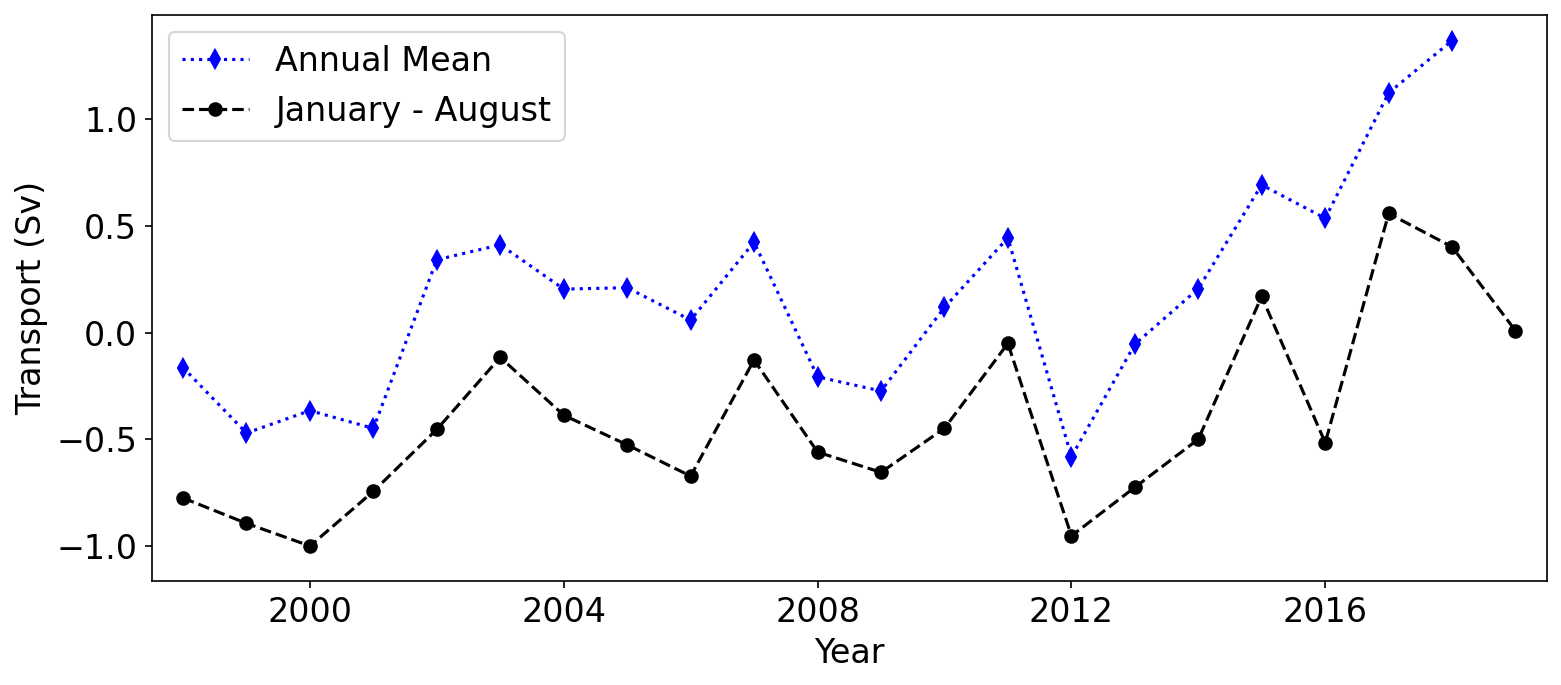

In [27]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from datetime import datetime
fig = plt.figure(figsize = (12,5),dpi=150)

plt.rcParams.update({'font.size': 16.0})
df = pd.read_table('../data/physicalData/beringStrait/BeringStrait_Monthlymeans_TEMPERATURE_Jan2021.txt',names = ['mooring','year','month','meanT','errorT'],skiprows=50,delim_whitespace=True,header=None)
df['month'] = df.month.astype(str)
df['year'] = df.year.astype(str)
df['monthYear'] = df.month+'-'+df.year
df['monthYear'] = pd.to_datetime(df.monthYear,format='%m-%Y')

dfFa = df[(df.monthYear.dt.month >= 1)& (df.monthYear.dt.month < 13)& (df.monthYear.dt.year != 1997)& (df.monthYear.dt.year != 2019)] # Summer
dfFa = dfFa.set_index('monthYear').resample('1Y').mean()
ax = plt.subplot(111)
ax.plot(dfFa.index-pd.Timedelta(days=365),dfFa.meanT,':d',color='blue',label= 'Transport')

dfFa = df[(df.monthYear.dt.month >= 1)& (df.monthYear.dt.month < 9)& (df.monthYear.dt.year != 1997)] # Summer
dfFa = dfFa.set_index('monthYear').resample('1Y').mean()
ax = plt.subplot(111)
ax.plot(dfFa.index-pd.Timedelta(days=365),dfFa.meanT,'--o',color='k',label= 'Transport')
    
ax.set_ylabel('Transport (Sv)', color='k')
plt.xlim(pd.to_datetime(1998,format='%Y')-pd.Timedelta(days=180),pd.to_datetime(2019,format='%Y')+pd.Timedelta(days=180))
ax.set_xlabel('Year')
plt.legend(['Annual Mean','January - August'])


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from datetime import datetime
fig = plt.figure(figsize = (12,5),dpi=150)

plt.rcParams.update({'font.size': 16.0})
df = pd.read_table('../data/physicalData/beringStrait/BeringStrait_Monthlymeans_TRANSPORT_Jan2021.txt',names = ['mooring','year','month','meanTr','errorTr','meanTrC','errorTrC'],skiprows=50,delim_whitespace=True,header=None)
df['month'] = df.month.astype(str)
df['year'] = df.year.astype(str)
df['monthYear'] = df.month+'-'+df.year
df['monthYear'] = pd.to_datetime(df.monthYear,format='%m-%Y')

dfFa = df[(df.monthYear.dt.month >= 1)& (df.monthYear.dt.month < 13)& (df.monthYear.dt.year != 1997)& (df.monthYear.dt.year != 2019)] # Summer
dfFa = dfFa.set_index('monthYear').resample('1Y').mean()
ax = plt.subplot(111)
ax.plot(dfFa.index-pd.Timedelta(days=365),dfFa.meanTrC,':d',color='blue',label= 'Transport')

dfFa = df[(df.monthYear.dt.month >= 1)& (df.monthYear.dt.month < 9)& (df.monthYear.dt.year != 1997)] # Summer
dfFa = dfFa.set_index('monthYear').resample('1Y').mean()
ax = plt.subplot(111)
ax.plot(dfFa.index-pd.Timedelta(days=365),dfFa.meanTrC,'--o',color='k',label= 'Transport')
    
ax.set_ylabel('Transport (Sv)', color='k')
plt.xlim(pd.to_datetime(1998,format='%Y')-pd.Timedelta(days=180),pd.to_datetime(2019,format='%Y')+pd.Timedelta(days=180))
ax.set_xlabel('Year')
plt.legend(['Annual Mean','January - August'])
